In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

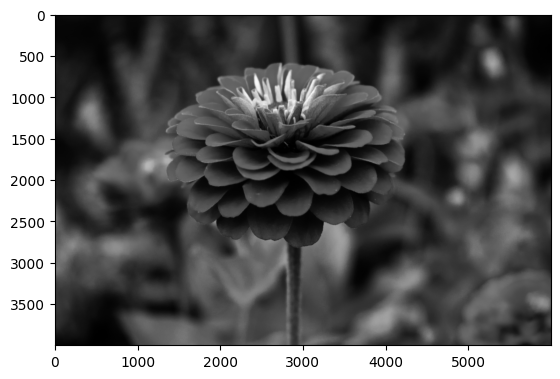

In [4]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")
plt.show()

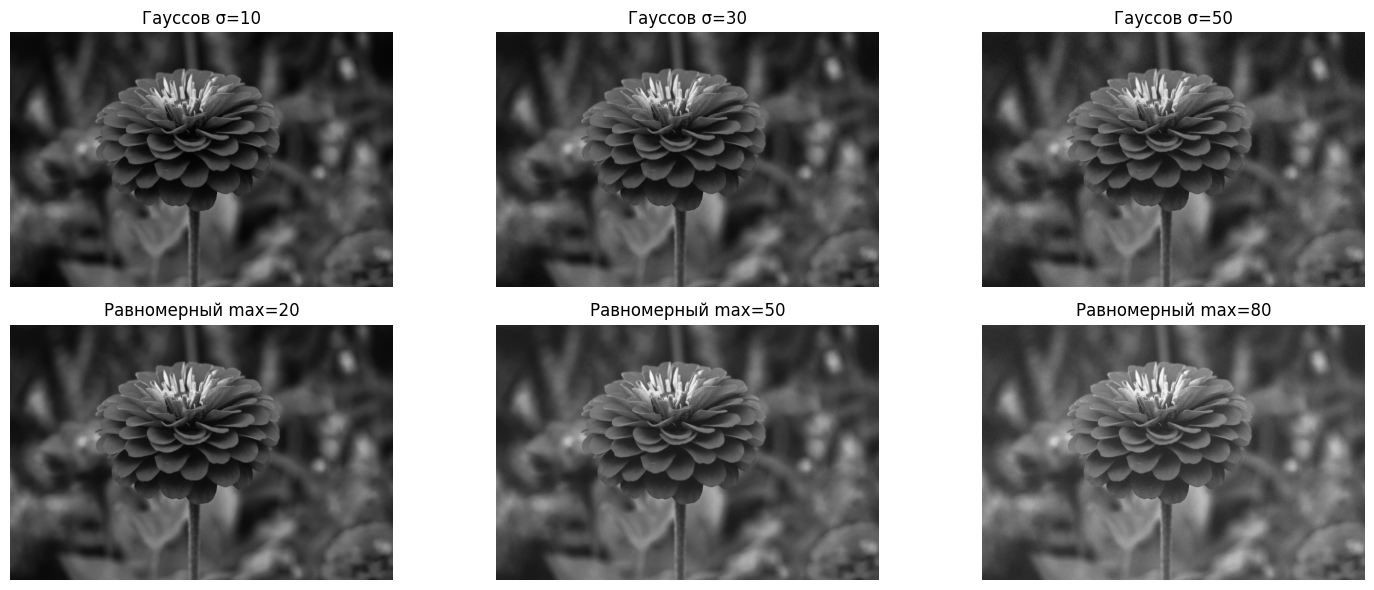

In [5]:
gauss_std_list = [10, 30, 50]         
uniform_range_list = [20, 50, 80]     

plt.figure(figsize=(15,6))

gauss_noises = []
for i, stddev in enumerate(gauss_std_list):
    noise_gauss = np.zeros(image_gray.shape, np.uint8)
    cv2.randn(noise_gauss, 0, stddev)
    image_noise_gauss = cv2.add(image_gray, noise_gauss)
    gauss_noises.append(image_noise_gauss)
    plt.subplot(2, len(gauss_std_list), i+1)
    plt.imshow(image_noise_gauss, cmap="gray")
    plt.title(f"Гауссов σ={stddev}")
    plt.axis("off")

uniform_noises = []
for i, max_val in enumerate(uniform_range_list):
    uniform_noise = np.random.randint(0, max_val, image_gray.shape).astype("uint8")
    image_noise_uniform = cv2.add(image_gray, uniform_noise)
    uniform_noises.append(image_noise_uniform)
    plt.subplot(2, len(uniform_range_list), i+1+len(uniform_range_list))
    plt.imshow(image_noise_uniform, cmap="gray")
    plt.title(f"Равномерный max={max_val}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [8]:
from skimage.metrics import structural_similarity, mean_squared_error

def get_res(filter_img) -> list:
    if len(filter_img.shape) == 3:
        filter_gray = cv2.cvtColor(filter_img, cv2.COLOR_BGR2GRAY)
    else:
        filter_gray = filter_img
    mse_value = mean_squared_error(image_gray, filter_gray)
    ssim_value, _ = structural_similarity(image_gray, filter_gray, full=True)
    return [mse_value, ssim_value]

params = {
    'Медианный': [3,5,7],
    'Гаусса': [(3,3),(5,5),(7,7)],
    'Билатериальный': [(5,75,75),(9,75,75),(11,100,100)],
}

def test_filters(noise_img, noise_type):
    results = []
    print(f"\nРезультаты для {noise_type} шума:")
    for filter_name, param_list in params.items():
        for param in param_list:
            if filter_name == 'Медианный':
                filtered = cv2.medianBlur(noise_img, param)
            elif filter_name == 'Гаусса':
                filtered = cv2.GaussianBlur(noise_img, param, 0)
            elif filter_name == 'Билатериальный':
                filtered = cv2.bilateralFilter(noise_img, *param)
            mse_val, ssim_val = get_res(filtered)
            results.append((filter_name, param, mse_val, ssim_val))

    results_sorted = sorted(results, key=lambda x: x[3], reverse=True)
    for i, r in enumerate(results_sorted[:5], 1):
        print(f"{i}: {r[0]} {r[1]}, MSE={r[2]:.2f}, SSIM={r[3]:.4f}")
    return results_sorted

for i, img_noise in enumerate(gauss_noises):
    print(f"\n{'='*20}\nТест для гауссовского шума {gauss_std_list[i]}")
    test_filters(img_noise, f"гауссовского {gauss_std_list[i]}")

for i, img_noise in enumerate(uniform_noises):
    print(f"\n{'='*20}\nТест для равномерного шума max={uniform_range_list[i]}")
    test_filters(img_noise, f"равномерного (max={uniform_range_list[i]})")


Тест для гауссовского шума 10

Результаты для гауссовского 10 шума:
1: Гаусса (3, 3), MSE=25.85, SSIM=0.8763
2: Гаусса (5, 5), MSE=26.13, SSIM=0.8685
3: Медианный 3, MSE=19.36, SSIM=0.8563
4: Гаусса (7, 7), MSE=27.03, SSIM=0.8559
5: Медианный 7, MSE=18.83, SSIM=0.8460

Тест для гауссовского шума 30

Результаты для гауссовского 30 шума:
1: Медианный 7, MSE=39.17, SSIM=0.8029
2: Билатериальный (11, 100, 100), MSE=149.84, SSIM=0.7846
3: Билатериальный (9, 75, 75), MSE=146.61, SSIM=0.7695
4: Медианный 5, MSE=49.67, SSIM=0.7440
5: Гаусса (7, 7), MSE=165.47, SSIM=0.7366

Тест для гауссовского шума 50

Результаты для гауссовского 50 шума:
1: Медианный 7, MSE=67.31, SSIM=0.7332
2: Билатериальный (11, 100, 100), MSE=366.11, SSIM=0.6846
3: Медианный 5, MSE=100.34, SSIM=0.6150
4: Гаусса (7, 7), MSE=441.13, SSIM=0.5960
5: Билатериальный (9, 75, 75), MSE=361.75, SSIM=0.5843

Тест для равномерного шума max=20

Результаты для равномерного (max=20) шума:
1: Гаусса (3, 3), MSE=100.39, SSIM=0.8481
2: Г